# Project BINF-F402
## Group 2

Daan Vandenberge, daan.vandenberge@ulb.be, 000577772

Karolien Heymans, karolien.heymans@ulb.be, 000577754

Fien Strijthaegen, fien.strijthaegen@ulb.be, 000532187



In [5]:
library(xtable)
library(dplyr)

Warning message:
"package 'xtable' was built under R version 4.2.3"
Warning message:
"package 'dplyr' was built under R version 4.2.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




## Clinical data

In [1]:
clinical_data = read.delim(file='clinical-data.tsv',sep ='\t',header=TRUE,row.names=1)# load in data with the read.delim 

In [2]:
Age = clinical_data$AGE
BMI = clinical_data$BMI
Cohort = clinical_data$COHORT
Hardy_scale = clinical_data$DTHHRDY
Heigth = clinical_data$HGHT
Ischemic_Time = clinical_data$TRISCHD
Sex = clinical_data$SEX
Weigth = clinical_data$WGHT
# every variable is assigned individually for easier work

all variables have been assigned to a vector. Next, the data is checked of there are any NA values in the clinical data.

In [3]:
any(is.na(Age))
any(is.na(BMI))
any(is.na(Cohort))
any(is.na(Hardy_scale))
any(is.na(Heigth))
any(is.na(Ischemic_Time))
any(is.na(Sex))
any(is.na(Weigth))
# this is done with the any function

[1] FALSE

[1] FALSE

[1] FALSE

[1] FALSE

[1] FALSE

[1] FALSE

[1] FALSE

[1] FALSE

every variable has no empty value

## Q1: explore clinical variables

Firstly, histogram plots are created to see how each variable is distributed in the clinical data

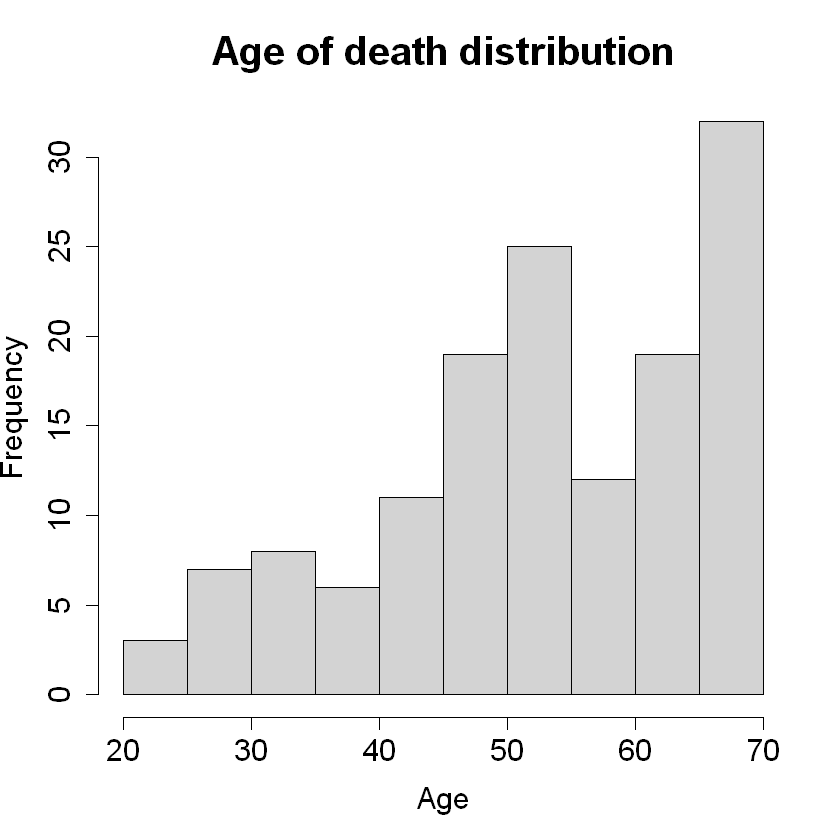

In [4]:
hist(Age, main = "Age of death distribution", xlab = "Age", ylab = "Frequency", cex.main = 2, cex.lab = 1.5, cex.axis = 1.5)
#this is done with the hist function 


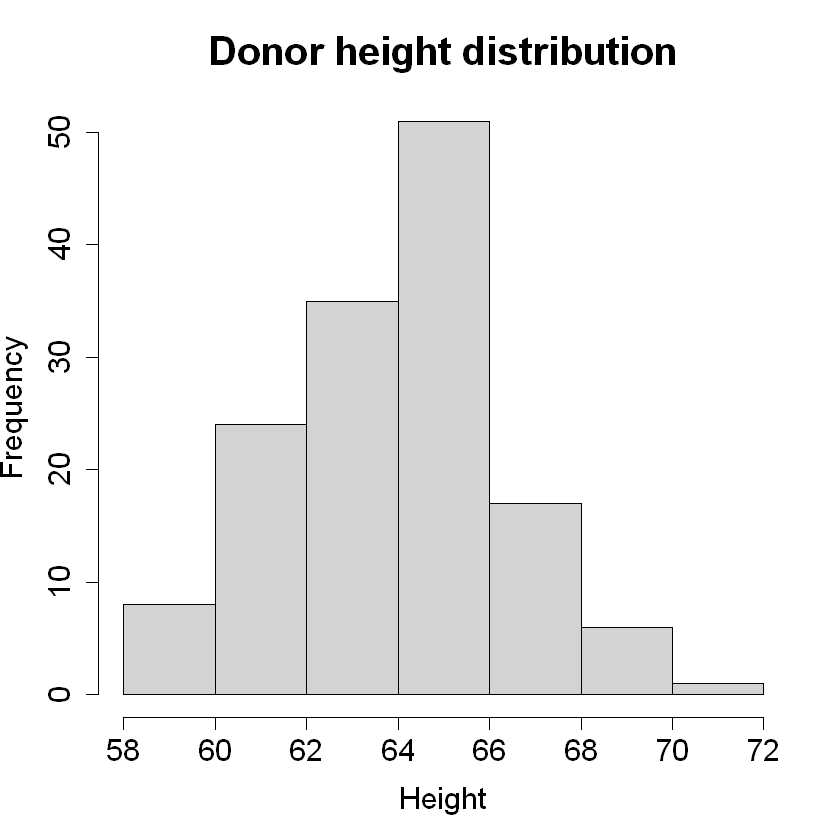

In [5]:
hist(Heigth, main = "Donor height distribution", xlab = "Height", ylab = "Frequency", cex.main = 2, cex.lab = 1.5, cex.axis = 1.5)

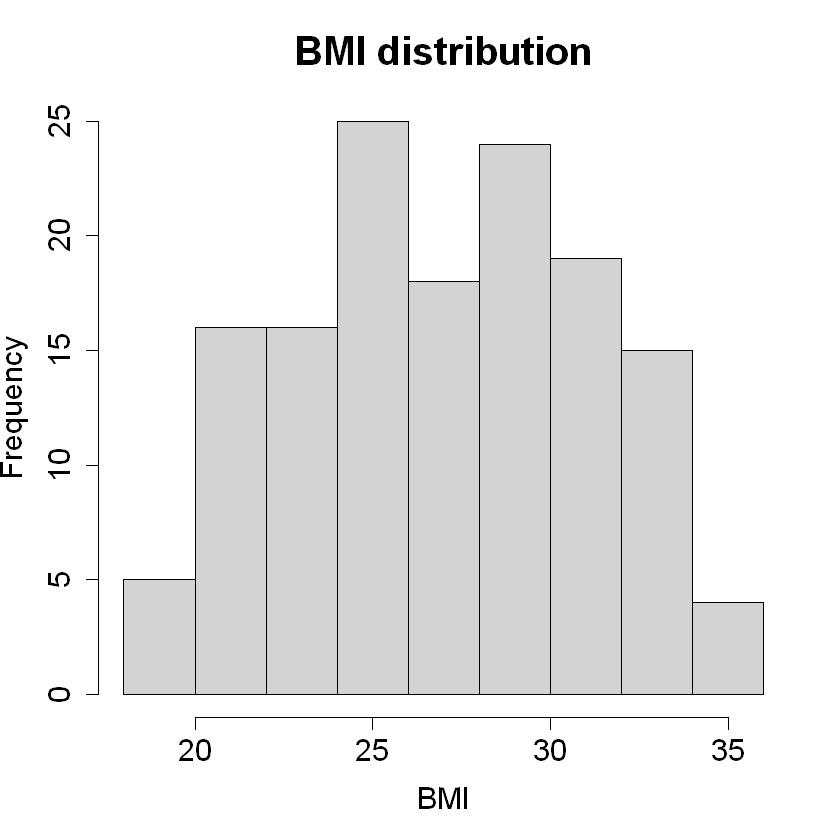

In [6]:
hist(BMI, main = "BMI distribution", xlab = "BMI", ylab = "Frequency", cex.main = 2, cex.lab = 1.5, cex.axis = 1.5)

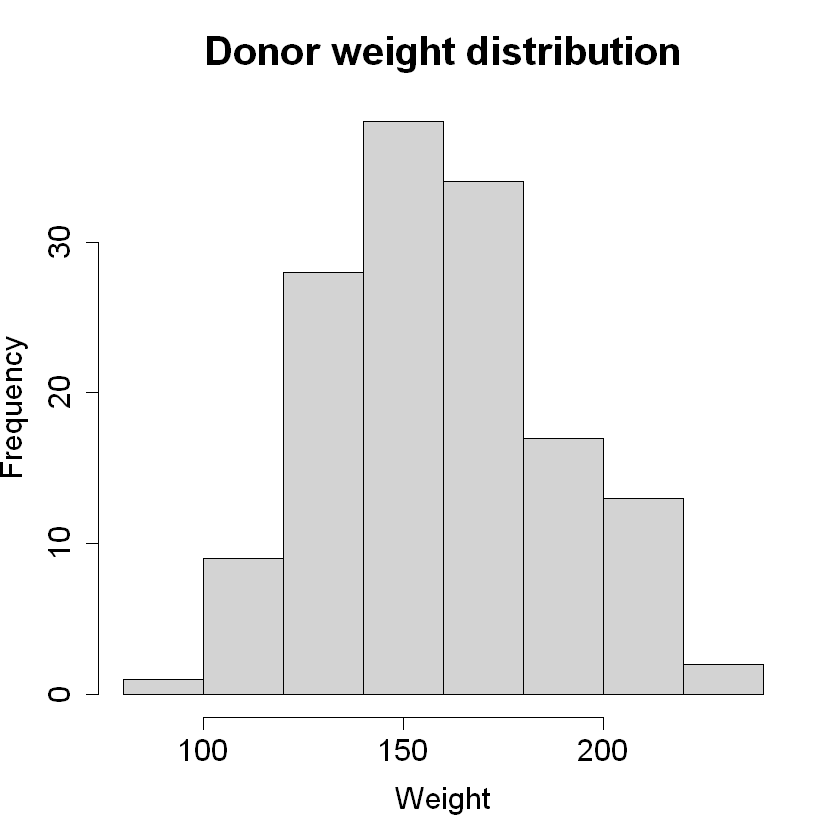

In [7]:
hist(Weigth, main = "Donor weight distribution", xlab = "Weight", ylab = "Frequency", cex.main = 2, cex.lab = 1.5, cex.axis = 1.5)

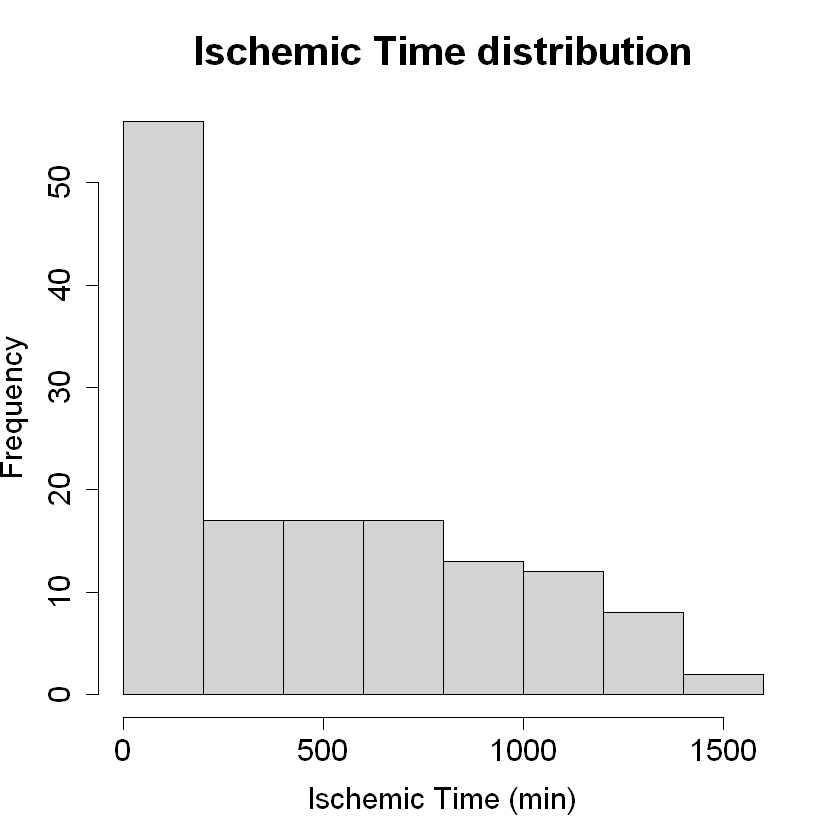

In [8]:
hist(Ischemic_Time,  main = "Ischemic Time distribution", xlab = "Ischemic Time (min)", ylab = "Frequency", cex.main = 2, cex.lab = 1.5, cex.axis = 1.5)

Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead."


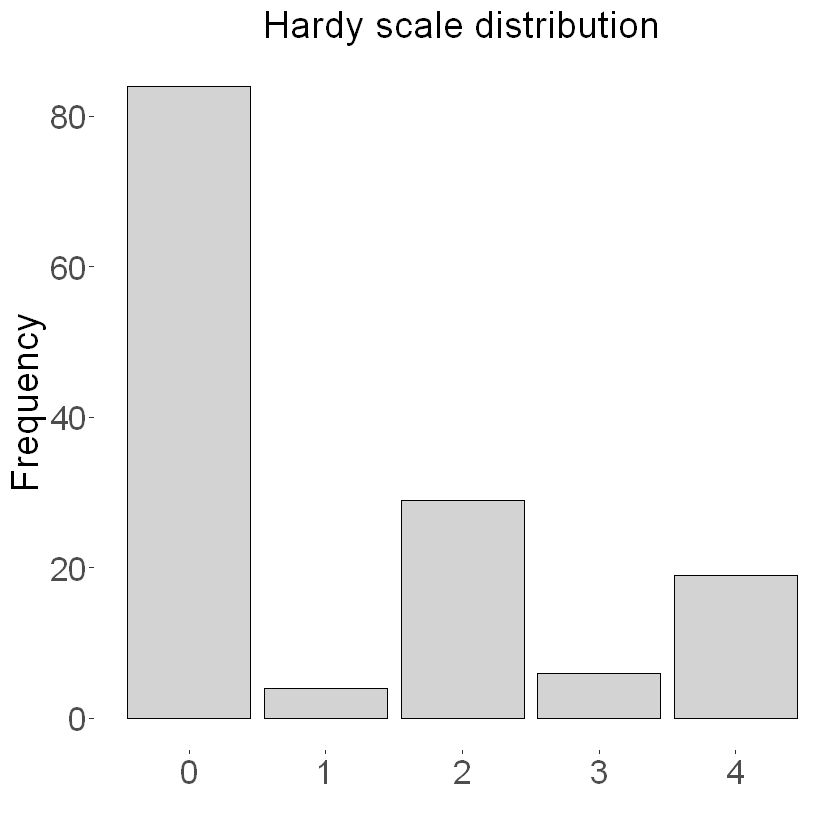

In [12]:
library(ggplot2)
       
ggplot(data = clinical_data, aes(x = DTHHRDY)) +
  geom_bar(fill = "lightgrey", color = "black", size = 0.3) +
  labs(title = "Hardy scale distribution", x = "", y = "Frequency") +
  theme(plot.title = element_text(size = 23, hjust = 0.5),
        axis.title = element_text(size = 23),
        axis.text.x = element_text(size = 20),
        axis.text.y = element_text(size = 20),
        panel.background = element_rect(fill = "white"))# for the distribution of hardy scale, we use the ggplot2 library

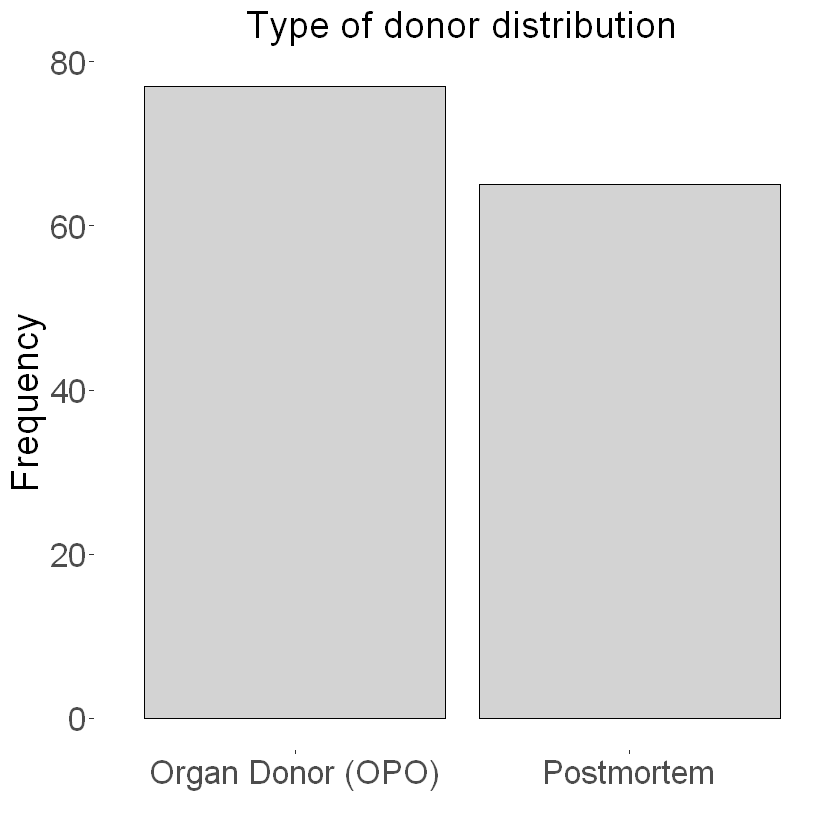

In [13]:
ggplot(data = clinical_data, aes(x = COHORT)) +
  geom_bar(fill = "lightgrey",color = "black", size = 0.3) +
  labs(title = "Type of donor distribution", x = "", y = "Frequency") +
  theme(plot.title = element_text(size = 23, hjust = 0.5),
        axis.title = element_text(size = 23),
        axis.text.x = element_text(size = 20),
        axis.text.y = element_text(size = 20),
        panel.background = element_rect(fill = "white"))#for the distribution of the donor type, we also used the ggpolt2 library
        


Next, the Shapiro-Wilik test was perfomed to test the normallity of the data for that variable

In [ ]:
shapiro.test(Age)


	Shapiro-Wilk normality test

data:  Age
W = 0.93931, p-value = 8.064e-06


In [ ]:
shapiro.test(BMI)


	Shapiro-Wilk normality test

data:  BMI
W = 0.97479, p-value = 0.009984


In [ ]:
shapiro.test(Hardy_scale)


	Shapiro-Wilk normality test

data:  Hardy_scale
W = 0.71614, p-value = 3.095e-15


In [ ]:
shapiro.test(Heigth)


	Shapiro-Wilk normality test

data:  Heigth
W = 0.98064, p-value = 0.04182


In [ ]:
shapiro.test(Ischemic_Time)



	Shapiro-Wilk normality test

data:  Ischemic_Time
W = 0.88707, p-value = 5.442e-09


In [14]:
OPO = subset(clinical_data, COHORT == "Organ Donor (OPO)")
POST = subset(clinical_data, COHORT == "Postmortem")

all x values are identical

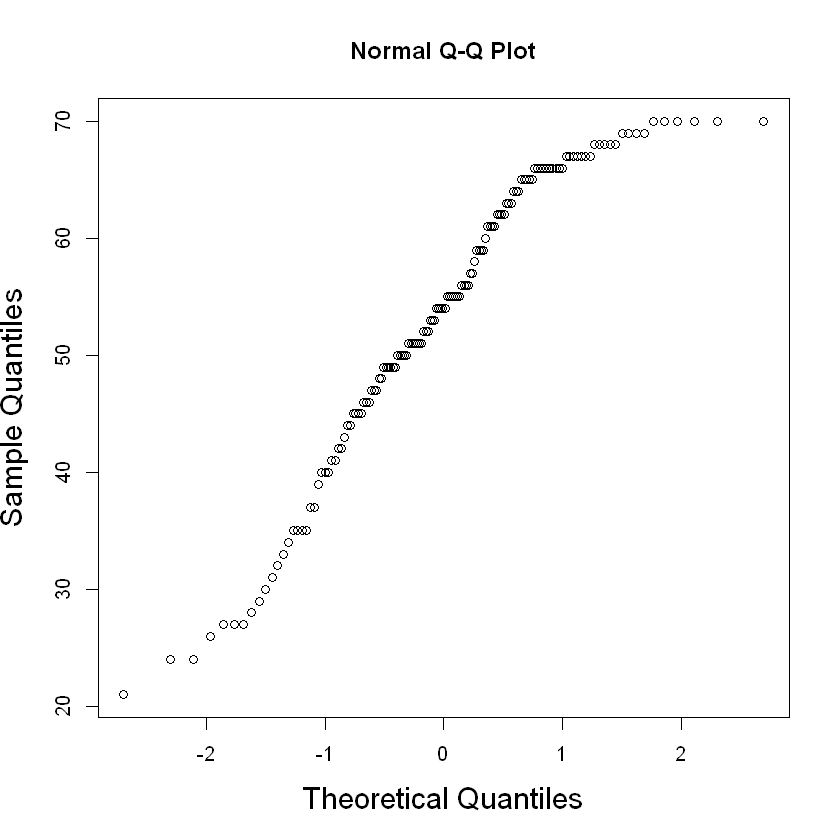

In [23]:
par(cex.lab = 1.5)  # Adjust the value as per your desired font size
qqnorm(Age)


## 1.2 Correlation of the clinical variables

The correlation can only be analyzed between the numerical clinical variables.

In [16]:
numerical_data <- clinical_data[, c("AGE", "HGHT", "WGHT", "BMI", "TRISCHD")]

In [ ]:
install.packages("corrplot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(corrplot)
library(ggplot2)

corrplot 0.92 loaded



In [17]:
correlation_matrix = cor(numerical_data, method = "spearman")
print(correlation_matrix)

                 AGE        HGHT        WGHT          BMI     TRISCHD
AGE      1.000000000 -0.03946346 -0.01047059  0.001525525  0.18672364
HGHT    -0.039463456  1.00000000  0.48052359  0.124056430  0.13886352
WGHT    -0.010470591  0.48052359  1.00000000  0.916885941  0.04901136
BMI      0.001525525  0.12405643  0.91688594  1.000000000 -0.03367039
TRISCHD  0.186723639  0.13886352  0.04901136 -0.033670390  1.00000000


The pairs() function is used to create a matrix of scatter plots for the numerical data.

now, we are going to perform the pearson correlatin test , to test the significance of the correlations

In [ ]:
cor.test(BMI, Weigth, method = "pearson")


	Pearson's product-moment correlation

data:  BMI and Weigth
t = 25.739, df = 140, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8748014 0.9335925
sample estimates:
      cor 
0.9085966 


In [ ]:
cor.test(Ischemic_Time, Age, method = "pearson")


	Pearson's product-moment correlation

data:  Ischemic_Time and Age
t = 2.2965, df = 140, p-value = 0.02313
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.02664188 0.34444936
sample estimates:
     cor 
0.190533 


In [ ]:
cor.test(Weigth, Heigth, method = "pearson")


	Pearson's product-moment correlation

data:  Weigth and Heigth
t = 7.1444, df = 140, p-value = 4.536e-11
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.3849394 0.6281347
sample estimates:
      cor 
0.5168906 


In [ ]:
cor.test(Ischemic_Time, Heigth, method = "pearson")


	Pearson's product-moment correlation

data:  Ischemic_Time and Heigth
t = 1.9277, df = 140, p-value = 0.05592
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.004036589  0.317124953
sample estimates:
      cor 
0.1607976 


In [ ]:
cor.test(BMI, Heigth, method = "pearson")


	Pearson's product-moment correlation

data:  BMI and Heigth
t = 1.414, df = 140, p-value = 0.1596
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.0469886  0.2779515
sample estimates:
      cor 
0.1186571 


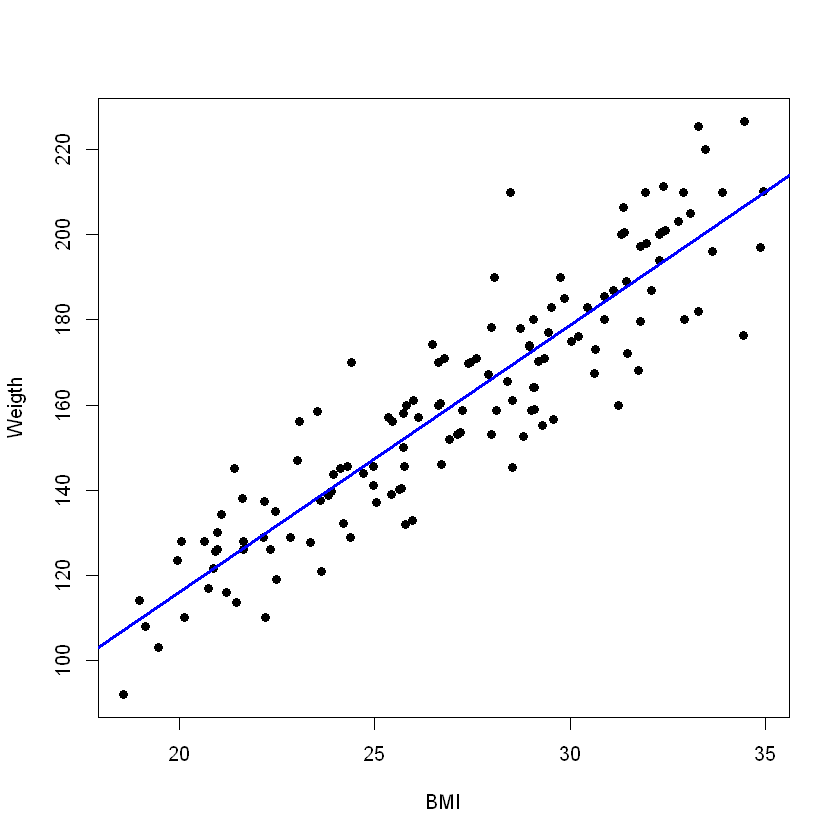

In [24]:
plot(BMI, Weigth, pch = 16)
abline(lm(Weigth ~ BMI), col = "blue", lwd = 3)

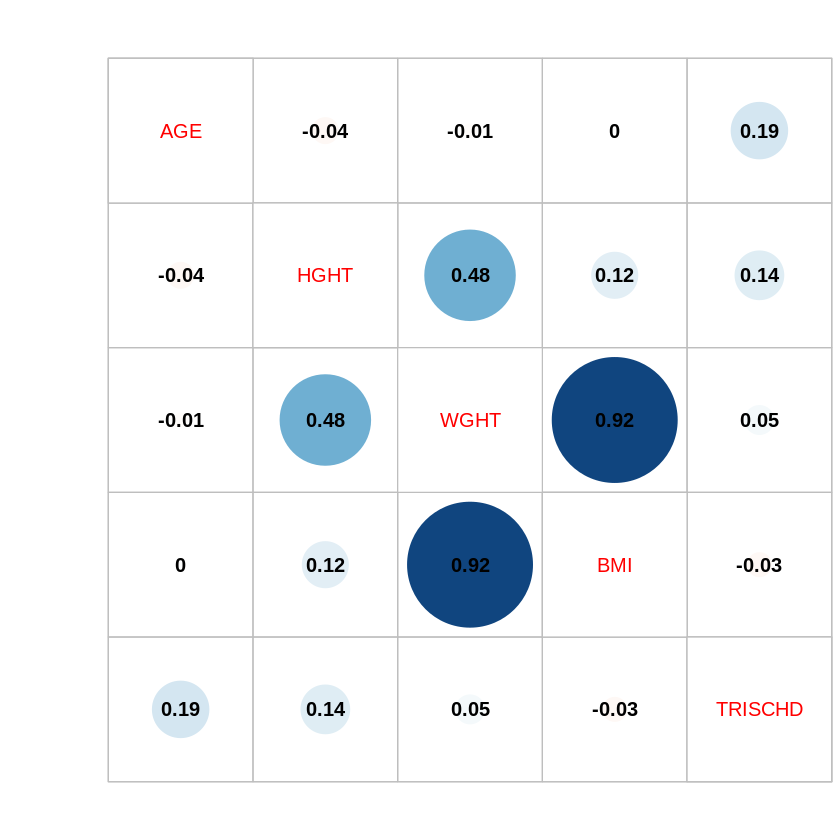

In [ ]:
#correlogram
corrplot(correlation_matrix, addCoef.col = 'black', tl.pos = 'd',
         cl.pos = 'n', col = COL2())

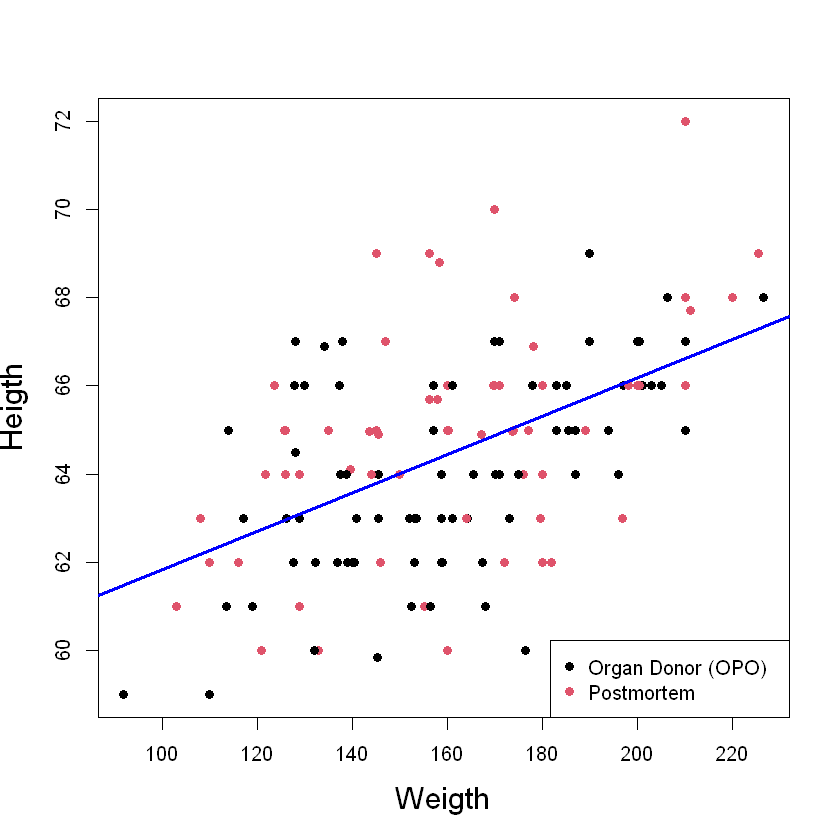

In [47]:
plot(Weigth, Heigth, pch = 16, col=factor(Cohort), cex.lab = 1.5)
abline(lm(Heigth ~ Weigth), col = "blue", lwd = 3)
legend("bottomright",
       legend = levels(factor(Cohort)),
       pch = 19,
       col = factor(levels(factor(Cohort))))
par(cex.lab = 10, cex.axis = 10)

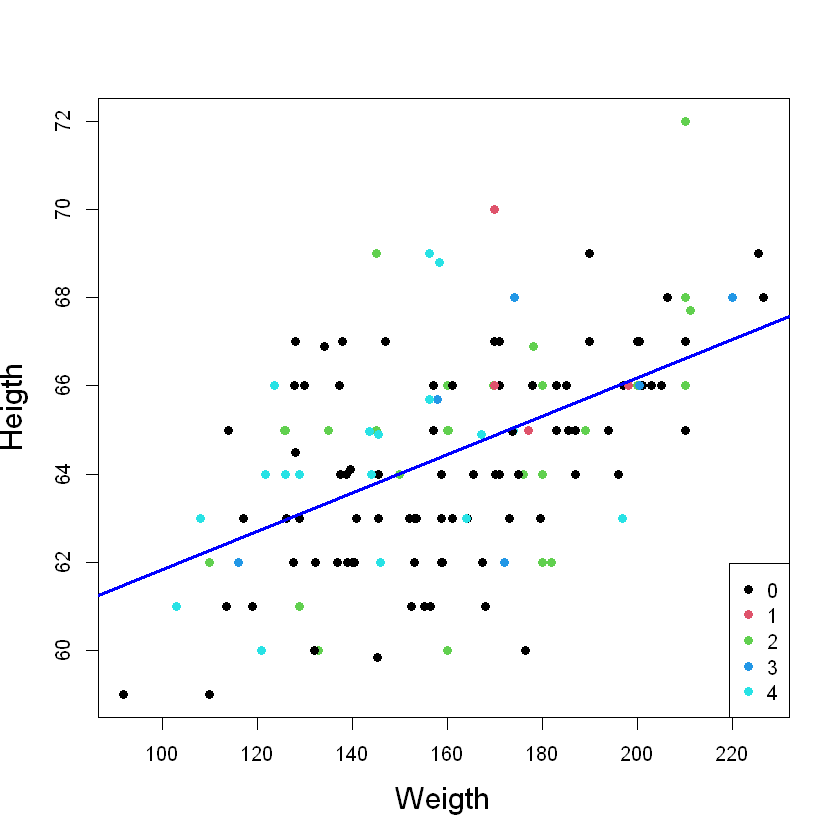

In [46]:
plot(Weigth, Heigth, pch = 16, col=factor(Hardy_scale), cex.lab = 1.5)
abline(lm(Heigth ~ Weigth), col = "blue", lwd = 3)
legend("bottomright",
       legend = levels(factor(Hardy_scale)),
       pch = 19,
       col = factor(levels(factor(Hardy_scale))))
par(cex.lab = 10, cex.axis = 10)

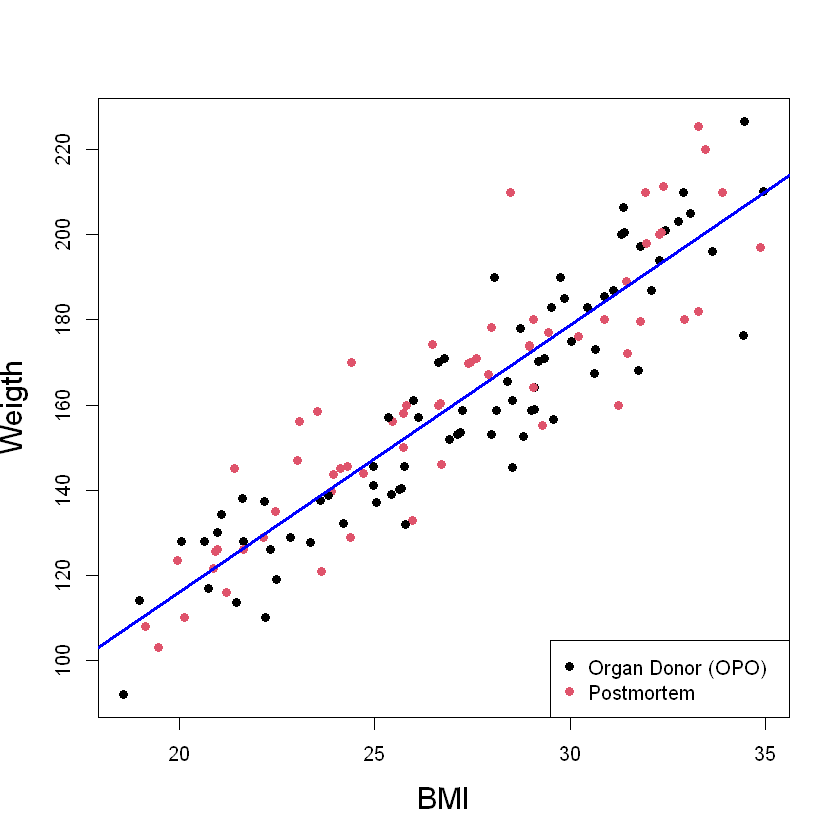

In [45]:
plot(BMI, Weigth, pch = 16, col=factor(Cohort), cex.lab = 1.5)
abline(lm(Weigth ~ BMI), col = "blue", lwd = 3)
legend("bottomright",
       legend = levels(factor(Cohort)),
       pch = 19,
       col = factor(levels(factor(Cohort))))
par(cex.lab = 10, cex.axis = 10)

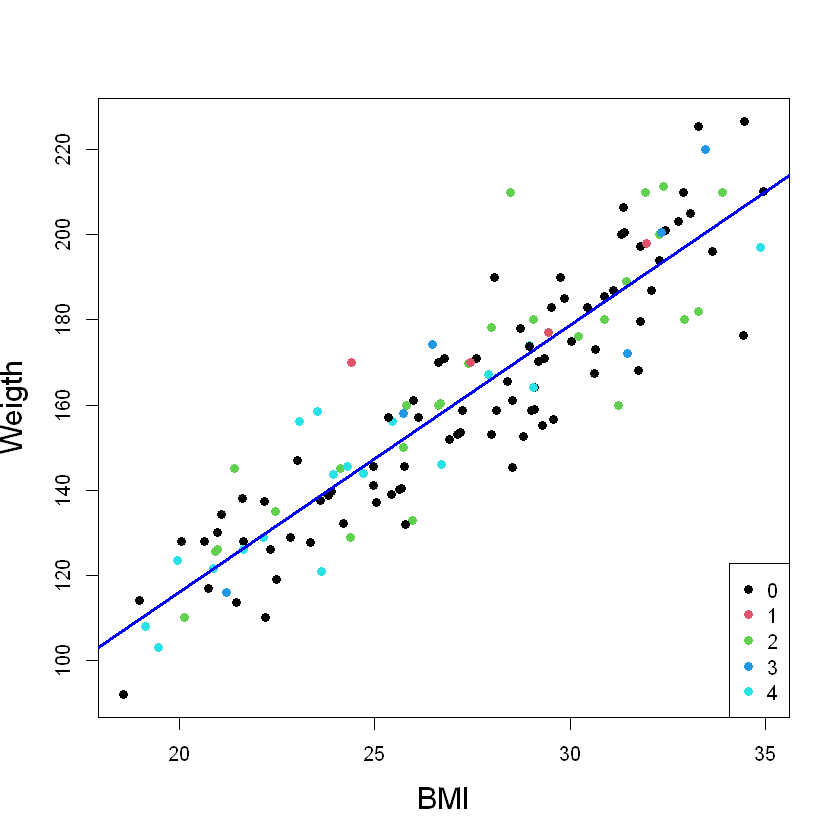

In [44]:
plot(BMI, Weigth, pch = 16, col=factor(Hardy_scale),cex.lab = 1.5)
abline(lm(Weigth ~ BMI), col = "blue", lwd = 3)
legend("bottomright",
       legend = levels(factor(Hardy_scale)),
       pch = 19,
       col = factor(levels(factor(Hardy_scale))))
par(cex.lab = 10, cex.axis = 10)

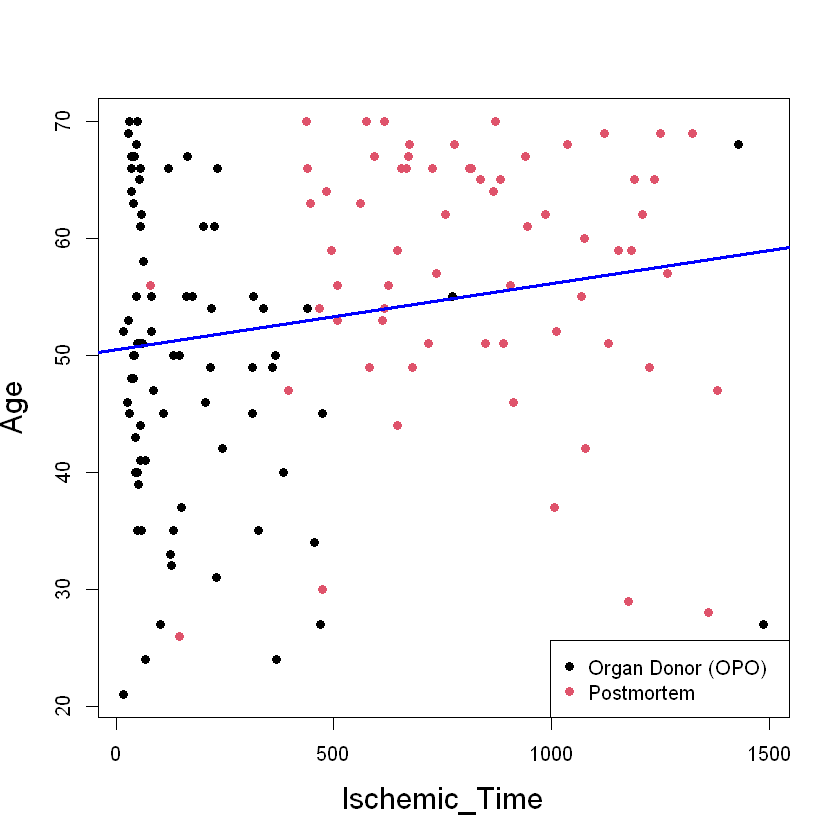

In [39]:
plot(Ischemic_Time, Age, pch = 16, col=factor(Cohort),cex.lab = 1.5)
abline(lm(Age ~ Ischemic_Time), col = "blue", lwd = 3)
legend("bottomright",
       legend = levels(factor(Cohort)),
       pch = 19,
       col = factor(levels(factor(Cohort))))
par(cex.lab = 10, cex.axis = 10)

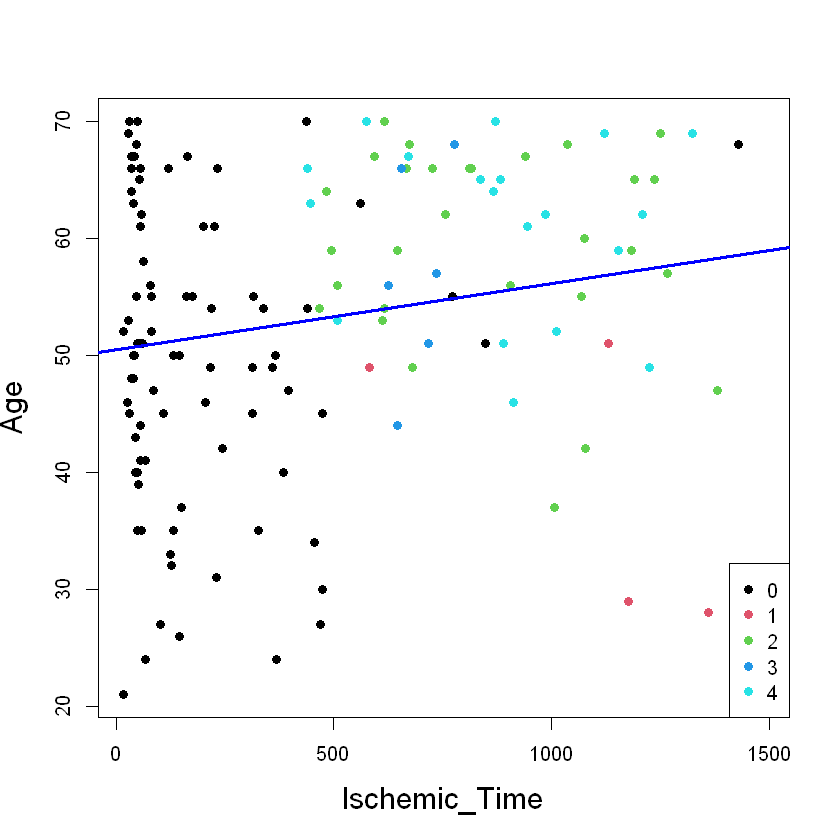

In [37]:
plot(Ischemic_Time, Age, pch = 16, col=factor(Hardy_scale),cex.lab = 1.5)
abline(lm(Age ~ Ischemic_Time), col = "blue", lwd = 3)
legend("bottomright",
       legend = levels(factor(Hardy_scale)),
       pch = 19,
       col = factor(levels(factor(Hardy_scale))))
par(cex.lab = 10, cex.axis = 10)

In [49]:
compare_table = table(as.factor(Cohort),as.factor(Hardy_scale))
print(compare_table)


                   
                     0  1  2  3  4
  Organ Donor (OPO) 77  0  0  0  0
  Postmortem         7  4 29  6 19


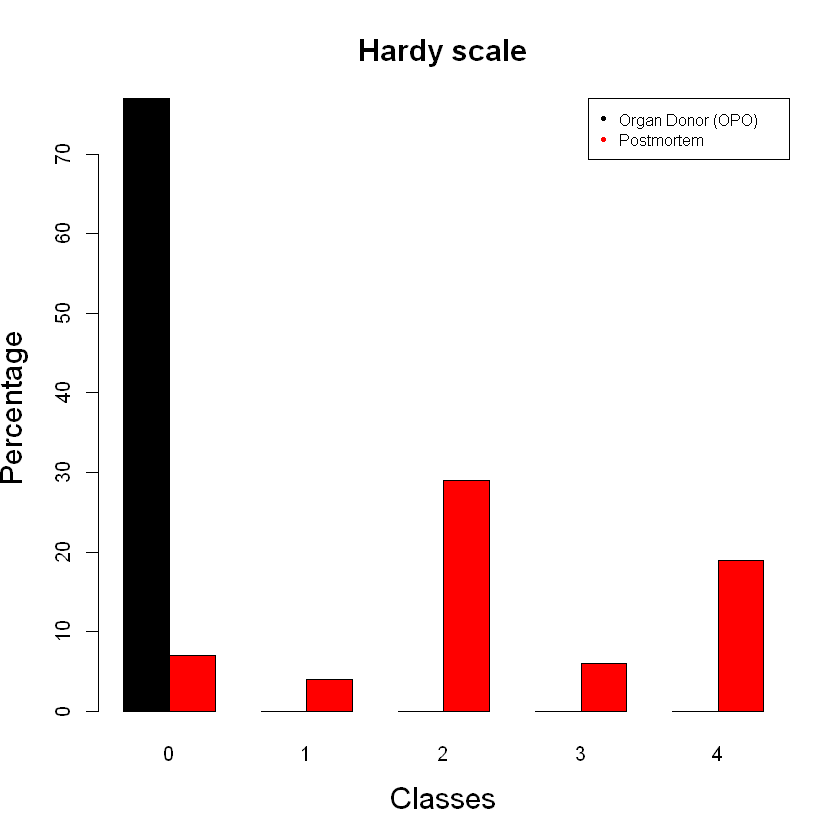

In [52]:

barplot(compare_table,
        col=c("black","red"),beside=TRUE)
title(main = "Hardy scale", cex.main = 1.5)  
title(xlab = "Classes", cex.lab = 1.5)     
title(ylab = "Percentage", cex.lab = 1.5)
legend("topright", legend=c("Organ Donor (OPO)", "Postmortem"),
       col=c("black", "red"), pch=20, cex=0.8)

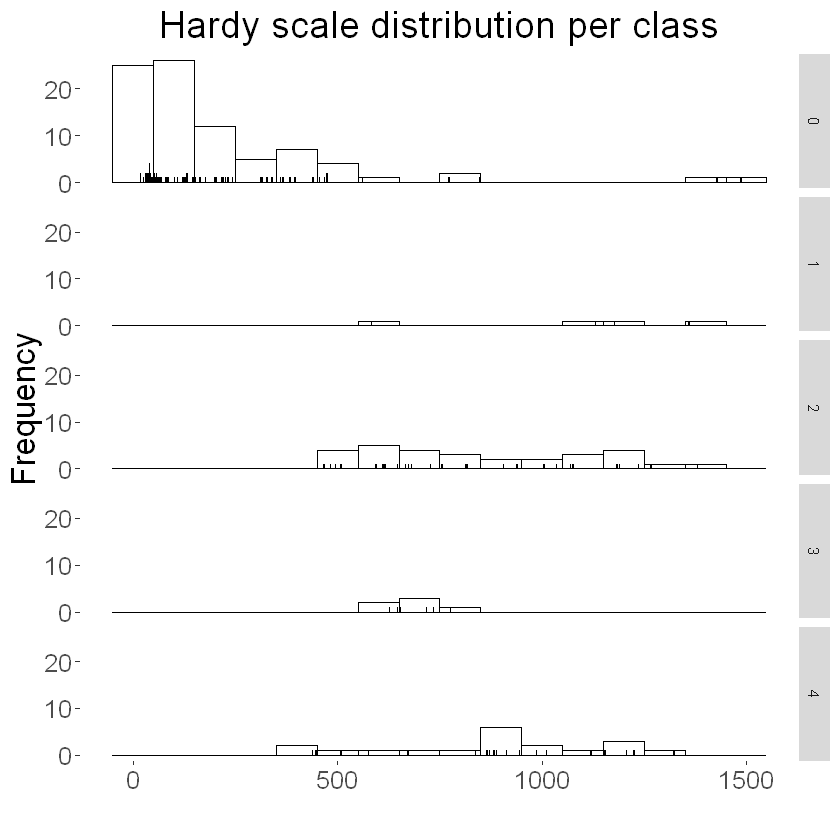

In [60]:
library(ggplot2)
ggplot(clinical_data, aes(x=TRISCHD)) +
  geom_histogram(fill="white", colour="black", binwidth=100) +
  facet_grid(DTHHRDY ~ .) +
  geom_bar(fill = "lightgrey", color = "black", size = 0.3) +
  labs(title = "Hardy scale distribution per class", x = "", y = "Frequency") +
  theme(plot.title = element_text(size = 23, hjust = 0.5),
        axis.title = element_text(size = 20),
        axis.text.x = element_text(size = 15),
        axis.text.y = element_text(size = 15),
        panel.background = element_rect(fill = "white"))



PCA analysis

Next , The PCA analysis was performed, using the prcomp function.First a subset of the data was created, that only contains the numerical elements

Importance of components:
                          PC1    PC2    PC3    PC4     PC5
Standard deviation     1.4502 1.1063 0.9805 0.8421 0.04849
Proportion of Variance 0.4206 0.2448 0.1923 0.1418 0.00047
Cumulative Proportion  0.4206 0.6654 0.8577 0.9995 1.00000

[1] 2.103098742 1.223966912 0.961392693 0.709190800 0.002350852
[1] 42.06197484 24.47933824 19.22785387 14.18381601  0.04701705


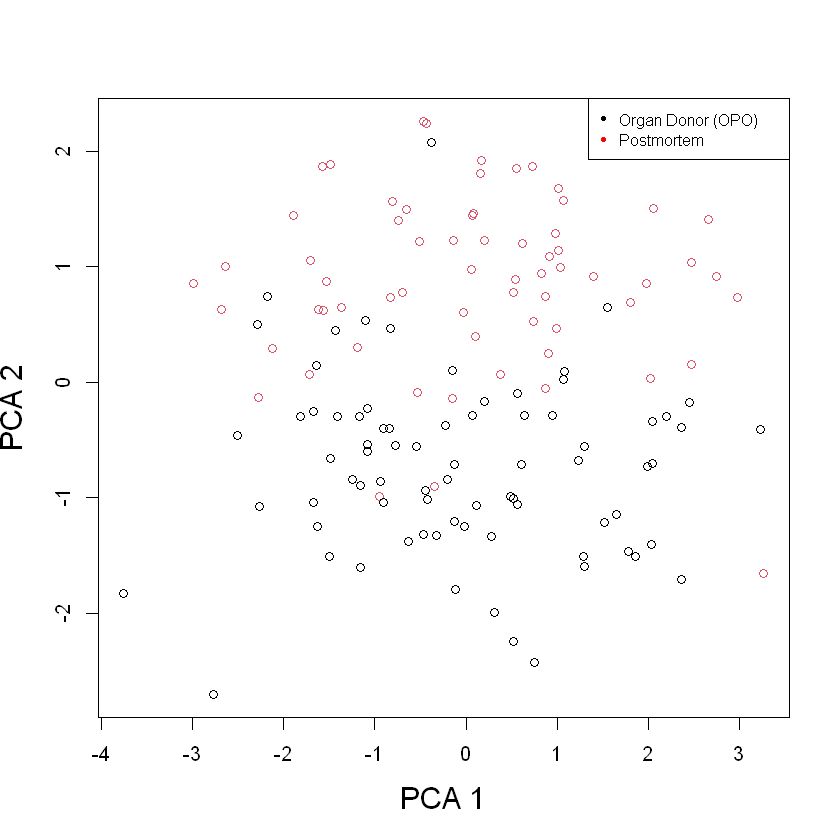

In [66]:
num_data = clinical_data[,c(2, 3, 4, 5, 8)]
PCA_data = scale(num_data)

PCA_analysis = prcomp(PCA_data, center = TRUE, scale. = TRUE)
summary(PCA_analysis)
plot(PCA_analysis$x[,1], PCA_analysis$x[,2], xlab = "PCA 1", ylab = "PCA 2", col = factor(Cohort), cex.lab = 1.5) 
legend("topright", legend=c("Organ Donor (OPO)", "Postmortem"),
       col=c("black", "red"), pch=20, cex=0.8)

# Add the dots representing the observations to the biplot
#invisible(text(PCA_analysis$x[,1], PCA_analysis$x[,2], labels = ".", cex = 2))

# Add a legend for the arrows representing the variables



print(PCA_analysis$sdev^2)# print out the eigenvalues
print(PCA_analysis$sdev^2/sum(PCA_analysis$sdev^2)*100)#percentage of variance explained by the pca




The PCA graph was created using the 'factoextra package'

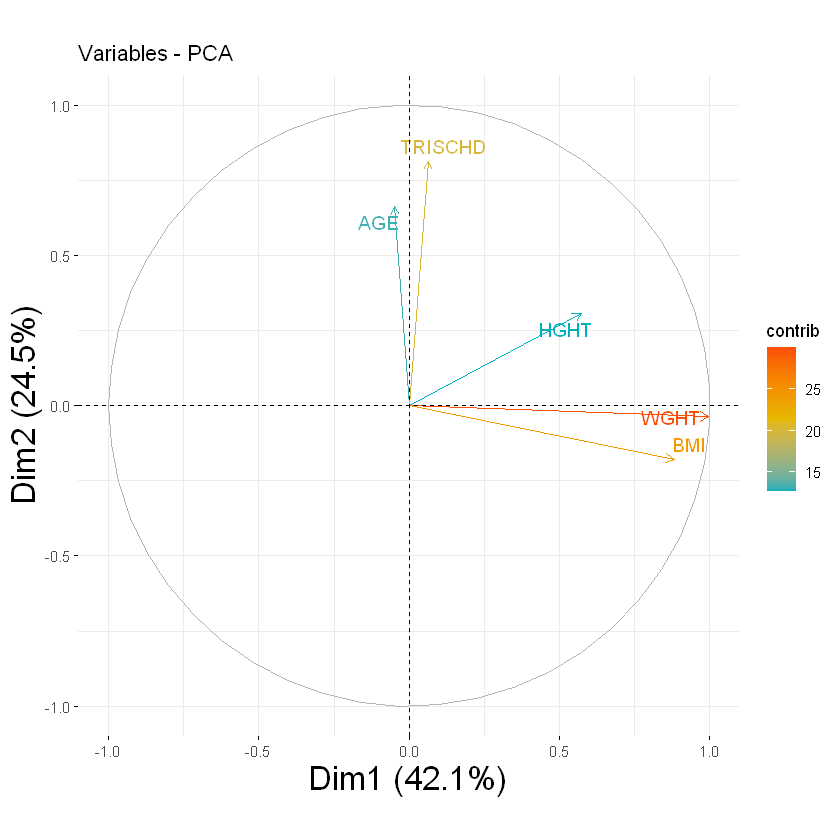

In [73]:
#install.packages("factoextra")
library(factoextra)
fviz_pca_var(PCA_analysis,col.var = "contrib", gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"), repel = TRUE) + 
  theme(axis.title = element_text(size = 20))


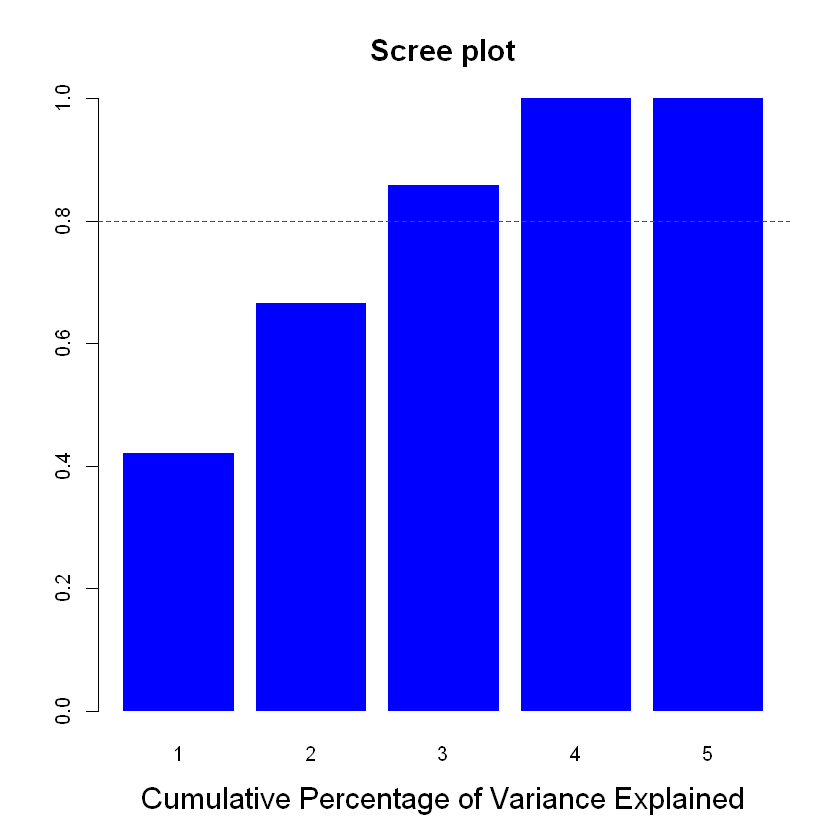

In [70]:
variances = PCA_analysis$sdev^2 / sum(PCA_analysis$sdev^2)
cum_variances = cumsum(variances)
barplot(cum_variances, main = "Scree plot", xlab = "Cumulative Percentage of Variance Explained", col = "blue", border = NA, names.arg = 1:length(cum_variances),cex.lab=1.5, cex.main=1.5)
abline(h = 0.8, lty = 2, col = "red")

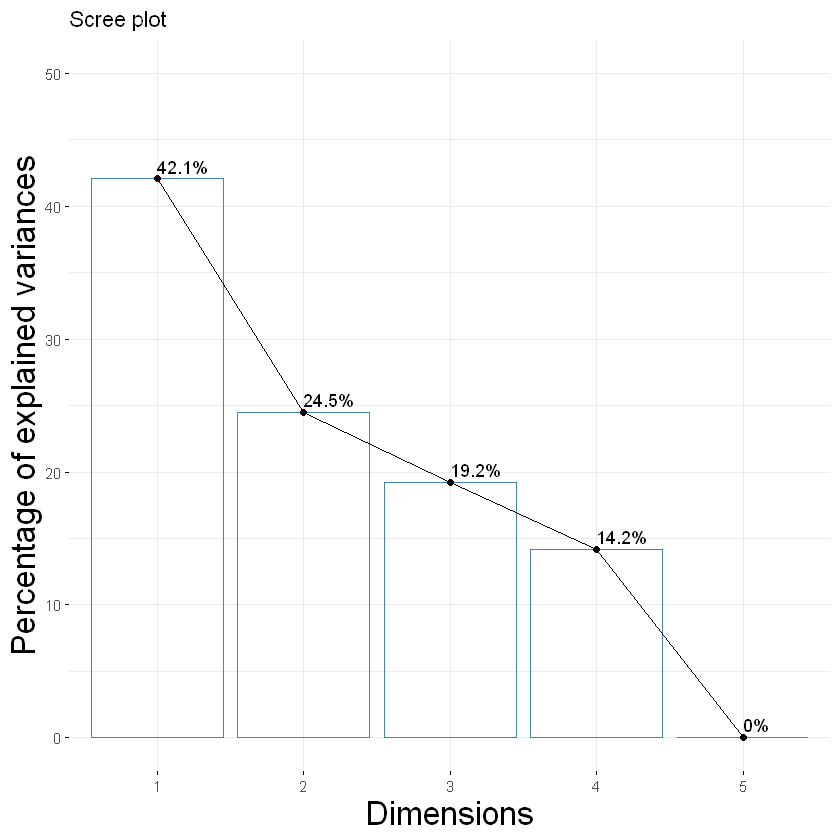

In [72]:
#prop_var = 100 * PCA_analysis$sdev^2 / sum(PCA_analysis$sdev^2)
#screeplot(PCA_analysis, type = "l", main = "Scree Plot", ylim = c(0, 60), 
          #ylab = "Percentage of variance explained", axes = FALSE)
#axis(2, at = seq(0, 60, by = 10), labels = seq(0, 60, by = 10))
#lines(prop_var, type = "b", pch = 19, col = "red")
fviz_eig(PCA_analysis, addlabels = TRUE, ylim = c(0, 50), barfill = cumsum(PCA_analysis$sdev^2)/sum(PCA_analysis$sdev^2)) + 
   theme(axis.title = element_text(size = 20)) 

In [74]:
head(PCA_data)

,AGE,HGHT,WGHT,BMI,TRISCHD
GTEX-1122O-0226,0.86772570,0.64160652,1.49574031,1.3791798,-1.0406059
GTEX-1128S-0126,1.02733328,0.64160652,-0.00743612,-0.2927816,0.8214603
GTEX-113JC-0126,-0.01011597,1.01578428,0.62879204,0.2300075,0.3326977
GTEX-11DXX-0226,1.02733328,0.01797693,-1.12607905,-1.3022222,-0.9905375
GTEX-11EM3-0126,-2.56383722,-2.26866492,-1.75531569,-1.1624906,-1.0811374
GTEX-11EMC-0226,1.02733328,-1.02140573,-1.75531569,-1.6660063,0.4638291


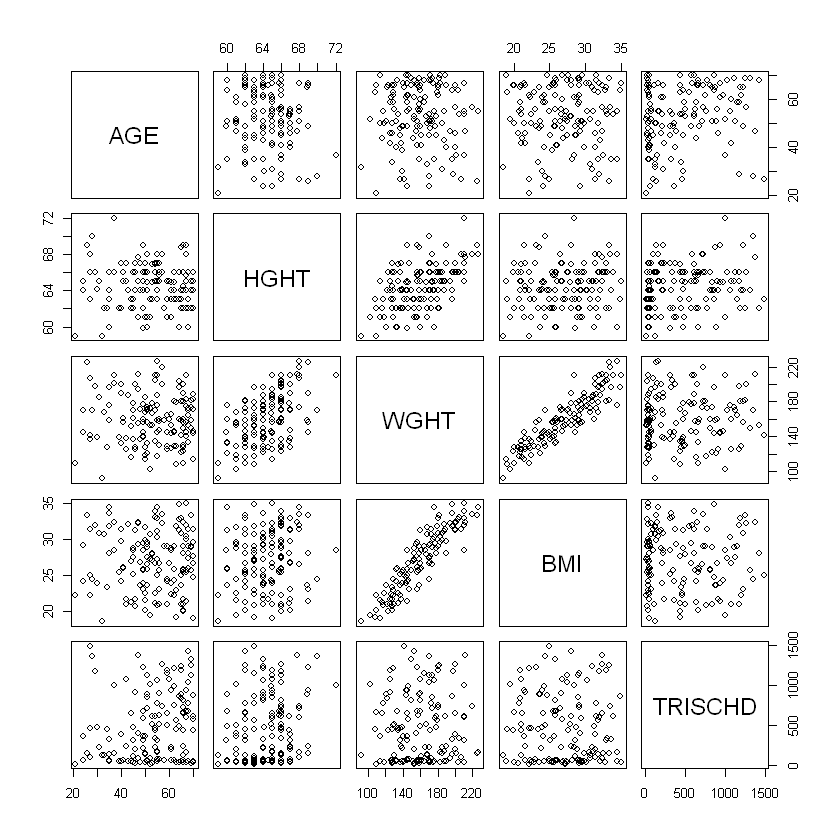

In [75]:
pairs(numerical_data)

# TODO: insert code from group2_part2

## Q3 Morphology vs gene expression

In [2]:
library(DESeq2)

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: 'BiocGenerics'


The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs


The following objects are masked from 'package:base':

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min



Attaching package: 'S4Vectors'


The following objects are masked from 'package:base':

    expand.grid, I, unname


Loading required package: IRanges


Attaching package: 'IRanges'


The following object is masked from 'package:grDevices':

    windows


Loading required package: GenomicRanges

Loading required p

In [1]:
morphological_counts = read.delim(file='morphological-counts.tsv',sep='\t',header=TRUE,row.names=1)
RNA_read_counts = read.delim(file='RNA-read-counts.tsv',sep='\t',header=TRUE,row.names=1)
RNA_read_counts = subset(RNA_read_counts, select = -1)
#Gtex ids have lines in rna file, but dots in morph file --> change ids in rna matrix
names(RNA_read_counts) = gsub("\\.","-",names(RNA_read_counts))
head(morphological_counts)
head(RNA_read_counts)

,Mophological.cluster.0,Mophological.cluster.1,Mophological.cluster.2,Mophological.cluster.3,Mophological.cluster.4,Mophological.cluster.5,Mophological.cluster.6,Mophological.cluster.7,Mophological.cluster.8,Mophological.cluster.9,⋯,Mophological.cluster.54,Mophological.cluster.55,Mophological.cluster.56,Mophological.cluster.57,Mophological.cluster.58,Mophological.cluster.59,Mophological.cluster.60,Mophological.cluster.61,Mophological.cluster.62,Mophological.cluster.63
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
GTEX-1122O-0226,171,133,105,235,13,399,350,681,484,105,⋯,146,264,50,44,30,98,1069,686,513,84
GTEX-1128S-0126,198,60,131,345,261,332,186,285,176,135,⋯,7,416,65,378,63,12,655,199,207,334
GTEX-113JC-0126,175,95,73,160,48,163,93,398,301,56,⋯,65,224,153,29,5,3,438,232,115,34
GTEX-11DXX-0226,79,52,144,20,30,177,177,18,462,213,⋯,93,270,72,69,63,3,131,285,67,43
GTEX-11EM3-0126,20,22,107,74,49,589,466,88,49,140,⋯,99,41,150,18,2,2,193,44,66,24
GTEX-11EMC-0226,24,35,161,50,233,84,29,42,76,65,⋯,26,77,114,218,2,0,110,19,10,70


,GTEX-1122O-0226,GTEX-1128S-0126,GTEX-113JC-0126,GTEX-11DXX-0226,GTEX-11EM3-0126,GTEX-11EMC-0226,GTEX-11GSP-0126,GTEX-11I78-0526,GTEX-11P81-0126,GTEX-11TTK-0826,⋯,GTEX-1PBJI-0726,GTEX-1QCLZ-0626,GTEX-1QEPI-0726,GTEX-1QP28-0626,GTEX-1QP67-0326,GTEX-1QPFJ-0626,GTEX-1R46S-0426,GTEX-1R9JW-0226,GTEX-1RDX4-0926,GTEX-1S5ZU-0726
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
ENSG00000223972.5,0,0,0,1,0,0,0,0,0,0,⋯,0,1,0,0,1,0,0,0,0,1
ENSG00000227232.5,132,259,87,207,122,251,99,125,119,321,⋯,202,173,164,85,288,183,136,74,168,169
ENSG00000278267.1,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ENSG00000243485.5,0,1,1,0,3,0,0,0,0,0,⋯,0,0,1,0,0,0,0,0,1,0
ENSG00000237613.2,0,0,0,0,1,0,0,0,0,0,⋯,0,1,0,0,0,0,0,1,0,0
ENSG00000268020.3,0,0,0,1,1,0,1,1,0,0,⋯,0,2,1,0,1,0,0,1,0,1


The provided RNA count file has no missing values

In [4]:
any(is.na(RNA_read_counts))


[1] FALSE

For every sample, we have the RNA counts of 56200 genes

In [13]:
dim(RNA_read_counts)

[1] 56200   142

We construct a vector containing the Median Absolute Deviation (MAD) of the RNA count of every gene. This is a measure of the variability.

In [3]:
MADvector = c()
for (i in 1:nrow(RNA_read_counts)){
  MADvector = c(MADvector,mad(as.numeric(RNA_read_counts[i,])))
}
summary(MADvector)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
     0.0      0.0      1.5    369.7     75.6 850445.3 

We filter the genes based on the MAD. We want to only keep the genes with a big variability in expression, so we keep the genes with a MAD above the median. This way we discard the 50% of the dataset that varies the least.

In [4]:
RNA_read_counts = RNA_read_counts[which(MADvector > 1.5),]
dim(RNA_read_counts)

[1] 27850   142

We normalize the rows of the morphological counts by dividing each count by the total count of the row.

In [5]:
frequencies_clusters = data.frame(rep(list(rep(0,nrow(morphological_counts))),ncol(morphological_counts)))
rownames(frequencies_clusters) = rownames(morphological_counts)
names(frequencies_clusters) = names(morphological_counts)
for (i in 1:nrow(morphological_counts)){
  sum_r = sum(morphological_counts[i,])
  frequencies_clusters[i,] <- morphological_counts[i,]/sum_r
}
head(frequencies_clusters)

,Mophological.cluster.0,Mophological.cluster.1,Mophological.cluster.2,Mophological.cluster.3,Mophological.cluster.4,Mophological.cluster.5,Mophological.cluster.6,Mophological.cluster.7,Mophological.cluster.8,Mophological.cluster.9,⋯,Mophological.cluster.54,Mophological.cluster.55,Mophological.cluster.56,Mophological.cluster.57,Mophological.cluster.58,Mophological.cluster.59,Mophological.cluster.60,Mophological.cluster.61,Mophological.cluster.62,Mophological.cluster.63
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GTEX-1122O-0226,0.011771995,0.009155996,0.007228418,0.016177888,0.000894947,0.02746799,0.024094727,0.046881454,0.033319565,0.007228418,⋯,0.0100509431,0.018174308,0.003442104,0.003029051,0.0020652623,0.0067465235,0.07359218,0.047225664,0.035315985,0.005782734
GTEX-1128S-0126,0.016727211,0.005068852,0.011066993,0.029145898,0.022049506,0.02804765,0.015713441,0.024077047,0.014868632,0.011404917,⋯,0.0005913661,0.035144040,0.005491256,0.031933767,0.0053222945,0.0010137704,0.05533497,0.016811692,0.017487539,0.028216609
GTEX-113JC-0126,0.017475534,0.009486719,0.007289794,0.015977631,0.004793289,0.01627721,0.009286998,0.039744358,0.030057919,0.005592171,⋯,0.0064909127,0.022368684,0.015278610,0.002895946,0.0004993010,0.0002995806,0.04373877,0.023167565,0.011483923,0.003395247
GTEX-11DXX-0226,0.009920884,0.006530202,0.018083637,0.002511616,0.003767424,0.02222780,0.022227804,0.002260455,0.058018335,0.026748713,⋯,0.0116790154,0.033906819,0.009041818,0.008665076,0.0079115911,0.0003767424,0.01645109,0.035790531,0.008413914,0.005399975
GTEX-11EM3-0126,0.002532287,0.002785515,0.013547734,0.009369461,0.006204102,0.07457584,0.059002279,0.011142061,0.006204102,0.017726007,⋯,0.0125348189,0.005191188,0.018992150,0.002279058,0.0002532287,0.0002532287,0.02443657,0.005571031,0.008356546,0.003038744
GTEX-11EMC-0226,0.005483208,0.007996345,0.036783185,0.011423349,0.053232808,0.01919123,0.006625543,0.009595613,0.017363491,0.014850354,⋯,0.0059401416,0.017591958,0.026045236,0.049805803,0.0004569340,0.0000000000,0.02513137,0.004340873,0.002284670,0.015992689


We will run an differential gene expression analysis for every morphological cluster except for cluster 14 (index 15 in the code here) because that one contains muscle tissue. Cluster 14 is used as a control variable.

In [7]:
rel_Morp = names(frequencies_clusters)[-c(15)]
dir.create("results_3_1") #create a folder on the computer to score result files
for (i in 1:length(rel_Morp)) {
  one_rel_Morph <- rel_Morp[i]
  print(one_rel_Morph)
  #design: ~ cluster_i + cluster14
  # cluster 14 is used as control: it contains irrelevant muscle tissue
  des <- as.formula(paste("~", one_rel_Morph, "+", names(frequencies_clusters)[15]))
  ddsfm <- DESeqDataSetFromMatrix(countData = RNA_read_counts,
                                  colData = frequencies_clusters, 
                                  design = des)
  ddsfm <- DESeq(ddsfm)
  res <- results(ddsfm)
  
  # Save res as a CSV file
  csv_file <- paste0("results_3_1\\res_", i, ".csv")
  write.csv(res, file = csv_file)
}

[1] "Mophological.cluster.0"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



[1] "Mophological.cluster.1"


estimating size factors

estimating dispersions

gene-wise dispersion estimates



: 

: 

To determine for each morphological cluster, the significantly associated genes, the following datasets were loaded. These datasets contain for each morphological cluster, the log 2 fold change and adjusted p-value for each gene.

In [2]:
stats = lapply(paste("results_3_1\\",list.files(path="results_3_1"),sep=""), read.csv)
length(stats)

[1] 63

First of all, the number of significant down-regulated and up-regulated genes associated with each morphological cluster were determined and stored in a table. In order to account for the multiple testing problem, we divide our threshold alpha = 0.1 by 64, since we tested 64 clusters. Then, the number of genes in that subset is counted and the number of upregulated and down-regulated genes. These values are then stored in a table for each morphological cluster.

TODO: waarom vinden we geen down-regulated genes

In [3]:
#Create a table with the numer of up- and down regulated genes for each cluster
sign_genes = data.frame(matrix(ncol=3, nrow=63))
colnames(sign_genes)=c("Total_regulated_genes", "Upregulated_genes", "Downregulated_genes")
threshold = 0.1/64
i = 1
for (s in stats) {
    #The number of significant genes
    significant = subset(s, padj < threshold)
    sign_genes[i,]$Total_regulated_genes = nrow(significant)

    #The number of up-regulated genes
    up = subset(significant, log2FoldChange > 0)
    sign_genes[i,]$Upregulated_genes = nrow(up)

    #The number of down-regulated genes
    down = subset(significant, log2FoldChange < 0)
    sign_genes[i,]$Downregulated_genes = nrow(down)
    i = i+1
}
sign_genes = cbind(Cluster=seq(0,63)[-15], sign_genes)
sign_genes

Cluster,Total_regulated_genes,Upregulated_genes,Downregulated_genes
<int>,<int>,<int>,<int>
0,11,11,0
1,0,0,0
2,13,13,0
3,4,4,0
4,11,11,0
5,6,6,0
6,7,7,0
7,4,4,0
8,2,2,0


In [89]:
# To print the latex code
significant_genes_xtable = xtable(significant_genes_table)
latex_code = print.xtable(significant_genes_xtable,tabular.environment = "longtable", floating = FALSE,include.rownames = FALSE)

% latex table generated in R 4.2.1 by xtable 1.8-4 package
% Thu Jun  1 16:36:48 2023
\begin{longtable}{rrrr}
  \hline
Cluster & Up-regulated genes & Down-regulated genes & Total regulated genes \\ 
  \hline
  0 &  11 &   0 &  11 \\ 
    1 &   0 &   0 &   0 \\ 
    2 &  13 &   0 &  13 \\ 
    3 &   4 &   0 &   4 \\ 
    4 &  11 &   0 &  11 \\ 
    5 &   6 &   0 &   6 \\ 
    6 &   7 &   0 &   7 \\ 
    7 &   4 &   0 &   4 \\ 
    8 &   2 &   0 &   2 \\ 
    9 &   0 &   0 &   0 \\ 
   10 &   7 &   0 &   7 \\ 
   11 &   1 &   0 &   1 \\ 
   12 &  13 &   0 &  13 \\ 
   13 &  11 &   0 &  11 \\ 
   15 &   9 &   0 &   9 \\ 
   16 &   9 &   0 &   9 \\ 
   17 &  12 &   0 &  12 \\ 
   18 &  15 &   0 &  15 \\ 
   19 &  13 &   0 &  13 \\ 
   20 &   0 &   0 &   0 \\ 
   21 &  10 &   0 &  10 \\ 
   22 &   1 &   0 &   1 \\ 
   23 &  12 &   0 &  12 \\ 
   24 &   3 &   0 &   3 \\ 
   25 &   7 &   0 &   7 \\ 
   26 &  12 &   0 &  12 \\ 
   27 &  14 &   0 &  14 \\ 
   28 &   5 &   0 &   5 \\ 
   29 &  1

Do determine which genes are the most upregulated, a new dataset was made including all the up-regulated genes.

In [7]:
# Create an empty list to store the subsets
subset_list = list()

# Function to store significant genes
store_significant_genes <- function(cluster) {
  threshold = 0.1 / 64
  
  # Filter significant genes based on the threshold
  significant_genes <- subset(cluster, padj < threshold)    
  
  # Add the subset to the list
  subset_list <<- append(subset_list, list(significant_genes))
}

for (dataset in stats) {
  store_significant_genes(dataset)
}

In [8]:
# Combine the subsets into one dataset
combined_dataset = bind_rows(subset_list)

ordered_combined_dataset = combined_dataset %>%
    arrange(padj)

In [9]:
print(ordered_combined_dataset[1:10,])

                    X baseMean log2FoldChange    lfcSE     stat       pvalue
1  ENSG00000177791.11 288.5799       42.73432 5.167865 8.269242 1.348133e-16
2  ENSG00000177791.11 288.5799       42.70095 5.166966 8.264221 1.406104e-16
3  ENSG00000068976.13 800.6482       43.25370 5.251013 8.237211 1.762719e-16
4  ENSG00000068976.13 800.6482       43.17253 5.250647 8.222327 1.995927e-16
5  ENSG00000177791.11 288.5799       42.26015 5.160528 8.189114 2.631571e-16
6  ENSG00000177791.11 288.5799       40.94918 5.053901 8.102490 5.384576e-16
7  ENSG00000068976.13 800.6482       42.79868 5.240472 8.166952 3.162792e-16
8  ENSG00000177791.11 288.5799       42.26100 5.180419 8.157834 3.410857e-16
9  ENSG00000177791.11 288.5799       41.84001 5.166408 8.098471 5.565404e-16
10 ENSG00000068976.13 800.6482       42.56116 5.270594 8.075212 6.735950e-16
           padj
1  3.244955e-12
2  3.840070e-12
3  4.909172e-12
4  5.127536e-12
5  6.902610e-12
6  7.498022e-12
7  7.498022e-12
8  9.499236e-12
9  1.5499

In [22]:
distinct_upregulated = list()
top_10 = NULL
i = 1
while (length(distinct_upregulated) < 10) {
    name = ordered_combined_dataset[i,]$X
    if (!(name %in% top_10)) {
        top_10 = c(top_10, name)
        distinct_upregulated = append(distinct_upregulated, list(ordered_combined_dataset[i,]))
    }
    i = i+1
}
print(bind_rows(distinct_upregulated))

                    X  baseMean log2FoldChange    lfcSE     stat       pvalue
1  ENSG00000177791.11 288.57992       42.73432 5.167865 8.269242 1.348133e-16
2  ENSG00000068976.13 800.64816       43.25370 5.251013 8.237211 1.762719e-16
3   ENSG00000164879.6 260.92209       37.09716 4.721802 7.856569 3.947997e-15
4  ENSG00000196218.12 327.24179       42.61489 5.488603 7.764251 8.212891e-15
5   ENSG00000160808.9  93.32346       43.15085 5.686667 7.588075 3.246931e-14
6   ENSG00000187642.9  53.75550       42.00426 5.751366 7.303355 2.806803e-13
7   ENSG00000265142.8  23.71377       42.78964 6.273410 6.820795 9.053785e-12
8  ENSG00000101306.10  42.60544       42.45490 6.384114 6.650085 2.929239e-11
9   ENSG00000185482.7 220.34665       30.73581 4.680425 6.566885 5.137864e-11
10 ENSG00000138100.13  66.06091       40.00902 6.352761 6.297895 3.017156e-10
           padj
1  3.244955e-12
2  4.909172e-12
3  1.099517e-10
4  1.143645e-10
5  9.042703e-10
6  2.605649e-09
7  5.042958e-08
8  1.631586e-0

In [191]:
gene_id = top_10[10]

for (dataset_name in seq_along(subset_list)) {
    dataset = subset_list[[dataset_name]]
    
    if (gene_id %in% dataset[,1]){
        print(dataset_name)
    }
}

# Because the numbering starts at 0 and cluster 14 was left out,
# The numbers below 14 should be decreased by 1 to find the actual cluster number.

[1] 1
[1] 5
[1] 9
[1] 13
[1] 20
[1] 22
[1] 25
[1] 26
[1] 33
[1] 36
[1] 39
[1] 40
[1] 42
[1] 44
[1] 46
[1] 48
[1] 50
[1] 51
[1] 52
[1] 56
[1] 57
[1] 61


The next step is to identify the genes that occur in the top 10. This was done using the package *entrez*.

In [ ]:
# KAN IEMAND BIOMART INSTALLEREN EN DIT LADEN PLSSS
library(biomaRt)
mart <- useMart("ensembl", dataset = "hsapiens_gene_ensembl")

top_10_id = c('ENSG00000177791','ENSG00000068976','ENSG00000164879','ENSG00000196218','ENSG00000160808','ENSG00000187642','ENSG00000265142','ENSG00000101306','ENSG00000185482','ENSG00000138100')

gene_info1 <- getBM(attributes = c("ensembl_gene_id", "external_gene_name"), filters = "ensembl_gene_id", values = top_10_id[1], mart = mart)
print(gene_info1)

gene_info2 <- getBM(attributes = c("ensembl_gene_id", "external_gene_name"), filters = "ensembl_gene_id", values = top_10_id[2], mart = mart)
print(gene_info2)

gene_info3 <- getBM(attributes = c("ensembl_gene_id", "external_gene_name"), filters = "ensembl_gene_id", values = top_10_id[3], mart = mart)
print(gene_info3)

gene_info4 <- getBM(attributes = c("ensembl_gene_id", "external_gene_name"), filters = "ensembl_gene_id", values = top_10_id[4], mart = mart)
print(gene_info4)

gene_info5 <- getBM(attributes = c("ensembl_gene_id", "external_gene_name"), filters = "ensembl_gene_id", values = top_10_id[5], mart = mart)
print(gene_info5)

gene_info6 <- getBM(attributes = c("ensembl_gene_id", "external_gene_name"), filters = "ensembl_gene_id", values = top_10_id[6], mart = mart)
print(gene_info6)

gene_info7 <- getBM(attributes = c("ensembl_gene_id", "external_gene_name"), filters = "ensembl_gene_id", values = top_10_id[7], mart = mart)
print(gene_info7)

gene_info8 <- getBM(attributes = c("ensembl_gene_id", "external_gene_name"), filters = "ensembl_gene_id", values = top_10_id[8], mart = mart)
print(gene_info8)

gene_info9 <- getBM(attributes = c("ensembl_gene_id", "external_gene_name"), filters = "ensembl_gene_id", values = top_10_id[9], mart = mart)
print(gene_info9)

gene_info10 <- getBM(attributes = c("ensembl_gene_id", "external_gene_name"), filters = "ensembl_gene_id", values = top_10_id[10], mart = mart)
print(gene_info10)